## Examples in README.md

In [39]:
import numpy as np
import sys
if "../src/" not in sys.path:
    sys.path.insert(0,"../src/")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import tensorflow as tf

In [3]:
tf.VERSION

'1.14.0'

In [40]:
from pbcpy.field import DirectField
from pbcpy.grid import DirectGrid
from pbcpy.base import DirectCell

In [8]:
from pbcpy.formats.qepp import PP

In [9]:
water_dimer = PP(filepp="../tests/density_ks.pp").read()

In [10]:
rho = water_dimer.field

In [74]:
rho.grid.nr

array([125, 125, 125])

In [65]:
a = tf.convert_to_tensor(rho[:,:,:,0],dtype=tf.complex64)

In [66]:
aa=a.eval()

In [67]:
np.real(aa-rho).sum()

DirectField(7.70079206e-05)

In [68]:
b=tf.signal.fft3d(a)

In [73]:
c = b.eval()

In [70]:
tf_fft = c*rho.grid.dV

In [72]:
np_fft=rho.fft()[:,:,:,0]

In [71]:
tf_fft-np_fft

ReciprocalField([[[ 2.66999822e-05-1.94014629e-05j,
                    7.74164924e-07+3.13568569e-05j,
                   -2.26287464e-05-1.65379497e-05j, ...,
                    1.95854917e-05-1.38652601e-05j,
                   -2.17400008e-07+2.98893901e-05j,
                   -3.16507618e-05-2.18201137e-05j],
                  [-1.68113646e-05+1.85737434e-05j,
                   -4.03784409e-06-2.16465567e-05j,
                    1.64086585e-05+7.39411756e-06j, ...,
                   -1.64514265e-05+1.78081895e-05j,
                   -5.17291811e-06-2.84221700e-05j,
                    2.98955710e-05+1.33541318e-05j],
                  [-2.26540287e-06-3.88129212e-06j,
                    4.75912622e-06-1.91656718e-06j,
                    1.19635755e-06+5.34063836e-06j, ...,
                    3.50332410e-06-8.29726869e-06j,
                    4.93583821e-06+6.70573849e-06j,
                   -6.39293033e-06+1.86476409e-06j],
                  ...,
                  [ 2.0

In [63]:
np_fft

ReciprocalField([[[ 16.         +0.j        ,  -9.13573247+12.12024128j,
                    -3.68974449-12.50541464j, ...,
                     9.73451754 -3.3968763j ,  -3.68974449+12.50541464j,
                    -9.13573247-12.12024128j],
                  [ -9.97869527 +0.23907033j,   4.72522376 -6.67383413j,
                     1.94247512 +5.63743424j, ...,
                    -8.5174377  +3.34173329j,   2.66006677-10.09006233j,
                     6.70625034 +8.46468734j],
                  [ -2.03532946 +0.28394292j,   1.84865201 -2.8935182j ,
                     1.3686074  +3.96591201j, ...,
                     1.80725284 -0.68561684j,  -0.392803   +0.9652361j ,
                     0.41718884 +0.17498086j],
                  ...,
                  [  9.30599366 +1.07043052j,  -5.74341372 +5.93245267j,
                    -1.00145785 -6.46348149j, ...,
                     7.34317825 -1.75952474j,  -3.37163723 +8.18689677j,
                    -4.89767167 -8.21113068j],
 

In [90]:
rho_interp = rho.get_3dinterpolation([90,90,90])

In [91]:
rho_interp.shape

(90, 90, 90)

In [92]:
rho_interp.integral()

15.999915251442873

In [9]:
o_pos = water_dimer.ions[0].pos
h1_pos = water_dimer.ions[1].pos
h2_pos = water_dimer.ions[2].pos

In [10]:
o_h1_vec = o_pos.d_mic(h1_pos)
o_h2_vec = o_pos.d_mic(h2_pos)

In [107]:
o_h1_vec*2, o_h1_vec.to_crys()

(Coord([ 0.78612607, -0.87683293, -3.51489061]),
 Coord([ 0.0208, -0.0232, -0.093 ]))

In [11]:
from pbcpy.base import Coord
r0 = Coord([1,0,0],cell=rho.grid,basis="S")
r1 = Coord([0,1,0],cell=rho.grid,basis="S")
r2 = Coord([0,0,1],cell=rho.grid,basis="S")
rho_cut = rho.get_cut(r0=r0, r1=r1, r2=r2, center=o_pos, nr=[125,125,125])

In [12]:
rho_cut = rho.get_cut(r0=o_h1_vec*4, r1=o_h2_vec*4, center=o_pos, nr=[100,100])

In [13]:
rho_cut.grid.volume,rho_cut.grid.dV

(53.591672462796531, 0.0053591672462796527)

In [37]:
rho.grid.volume,rho.grid.dV

(6748.3345843151264, 0.0034551473071693446)

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

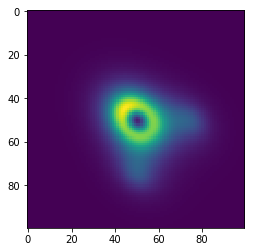

In [15]:
plt.imshow(rho_cut)

In [61]:
rho_cut.grid.dV

0.0034551473071693446

In [64]:
rho_cut.shape

(100, 100)

In [65]:
rho_cut.span

2

In [66]:
rho_cut.grid.lattice

array([[ 1.57225214, -6.68207161, -0.43149218],
       [-1.75366585, -3.04623853,  0.8479004 ],
       [-7.02978121,  0.97509868, -0.30802502]])

In [67]:
rho_g = rho.fft()

In [68]:
type(rho_g)

pbcpy.field.ReciprocalScalarField

In [69]:
rho1 = rho_g.ifft()

In [70]:
type(rho1)

pbcpy.field.DirectScalarField

In [71]:
rho1.grid == rho.grid

True

In [84]:
np.isclose(np.array(rho1), np.array(rho)).all()

True

In [78]:
assert(False)

AssertionError: 

In [16]:
from pbcpy.formats.xsf import XSF

In [17]:
XSF("test.xsf").write(water_dimer,field=rho_cut)